In [69]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [70]:
#imports

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

from sklearn.feature_extraction import DictVectorizer



%matplotlib inline

In [71]:
# get data
df_main = pd.read_csv("Clean_Dataset.csv")

# **EDA ON DATA**

In [72]:
df_main.shape

(300153, 12)

In [73]:
df_main.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


*We will drop column Unnamed: 0 as it is useless*

In [74]:
df_main.drop('Unnamed: 0', axis = 1, inplace = True)

We will search for any null values in the dataset 

In [75]:
df_main.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

The dataset looks clean already so we will see for any useless columns by checking column values

In [76]:
for col in list(df_main.columns):
    print("\nfor column : ", col,"\n")
    print(df_main[col].value_counts())


for column :  airline 

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91538
Evening          78323
Morning        

# **Visualizations**

In [77]:
categorical_cols = ['airline','source_city','departure_time', 'arrival_time', 'destination_city','class']

In [78]:
df_main.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<AxesSubplot: >

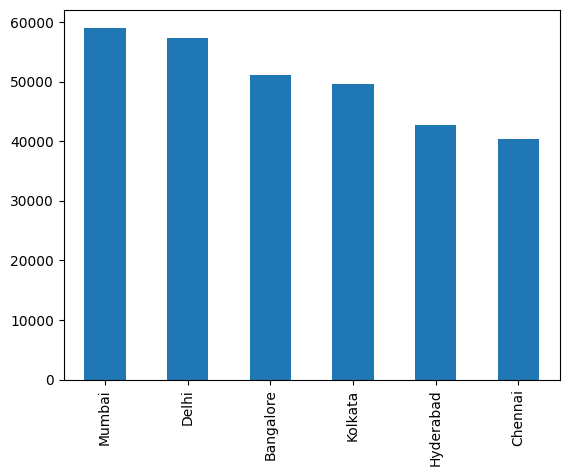

In [79]:
df_main.destination_city.value_counts().plot.bar()

# Prices of Destination cities mapped to avg prices

<AxesSubplot: xlabel='destination_city'>

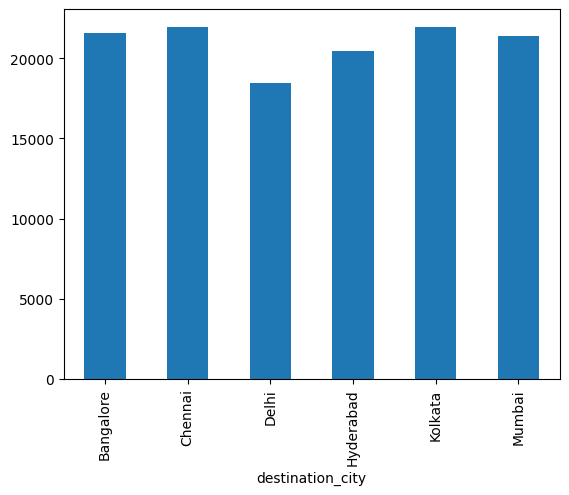

In [80]:
df_main.groupby("destination_city")['price'].mean().plot.bar()

<AxesSubplot: xlabel='source_city'>

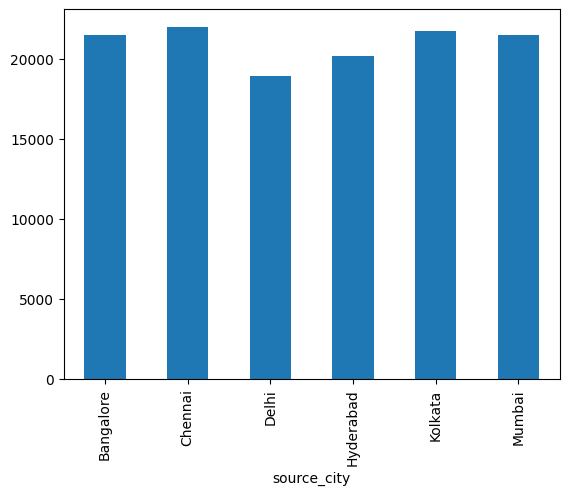

In [81]:
df_main.groupby("source_city")['price'].mean().plot.bar()

<AxesSubplot: xlabel='airline'>

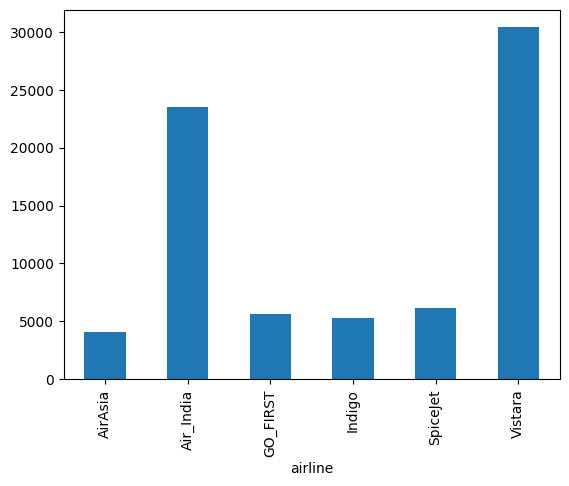

In [82]:
df_main.groupby("airline")['price'].mean().plot.bar()

<AxesSubplot: >

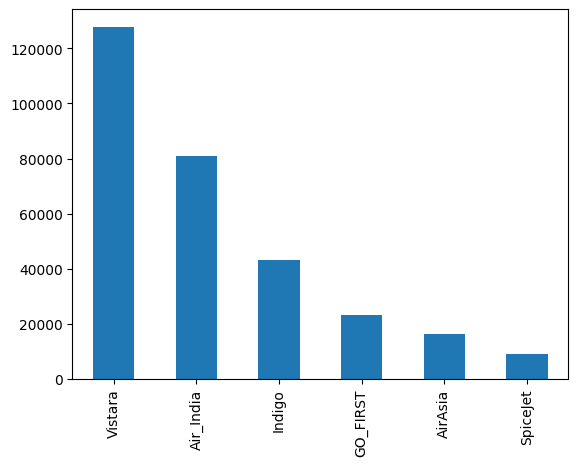

In [83]:
df_main.airline.value_counts().plot.bar()

<AxesSubplot: xlabel='stops'>

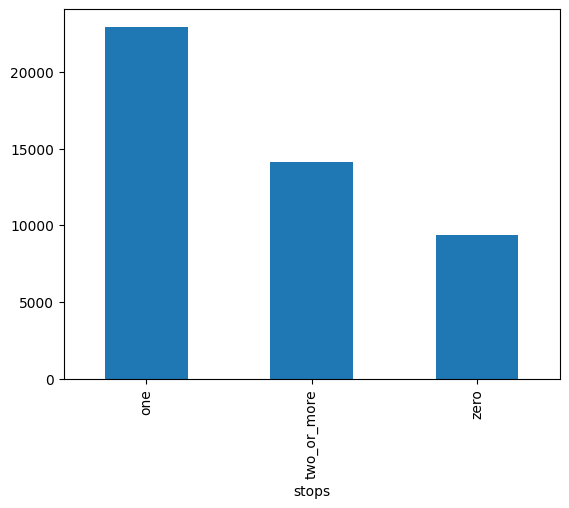

In [84]:
df_main.groupby("stops")['price'].mean().plot.bar()

<AxesSubplot: xlabel='days_left'>

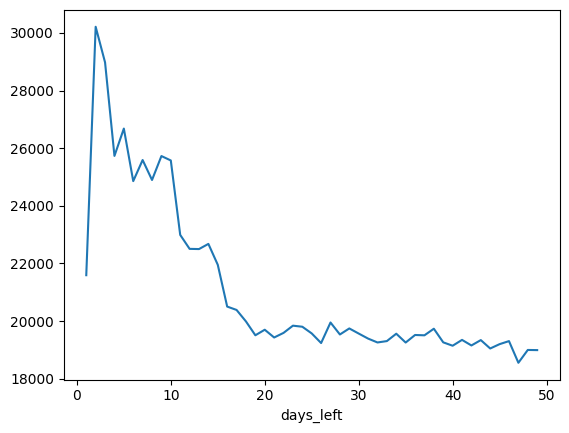

In [85]:
df_main.groupby("days_left")['price'].mean().plot()

<AxesSubplot: xlabel='departure_time'>

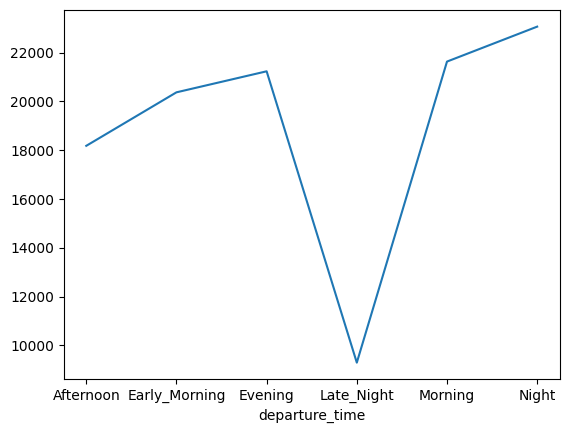

In [86]:
df_main.groupby("departure_time")['price'].mean().plot()

<AxesSubplot: xlabel='arrival_time'>

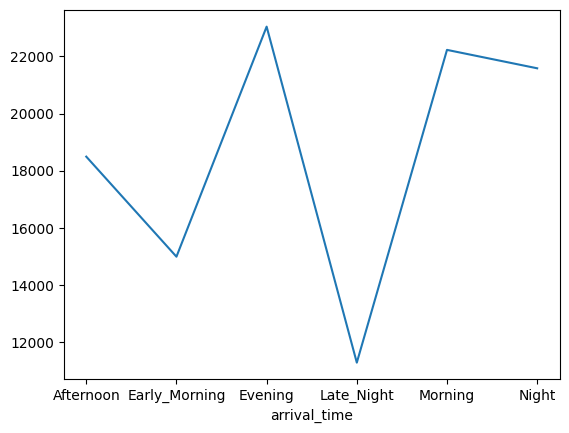

In [87]:
df_main.groupby("arrival_time")['price'].mean().plot()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype

<AxesSubplot: xlabel='class', ylabel='price'>

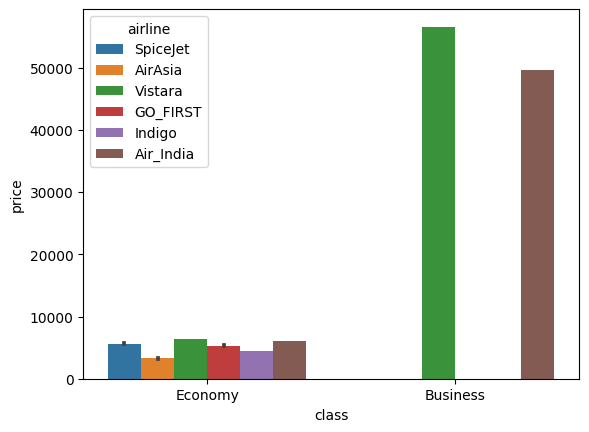

In [88]:
sns.barplot(x = "class", y ="price",  data = df_main, estimator = np.median, hue = "airline")

<AxesSubplot: ylabel='Frequency'>

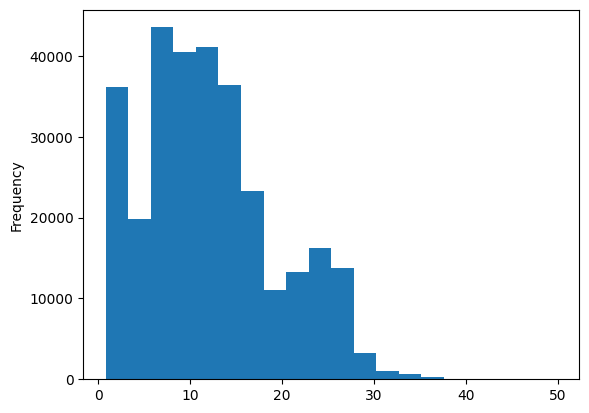

In [89]:
df_main.duration.plot.hist(bins = 20)

/var/folders/8v/cmf3zm1j19q729mqzcz63d480000gn/T/ipykernel_1974/2563928279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_main.corr(), annot = True)


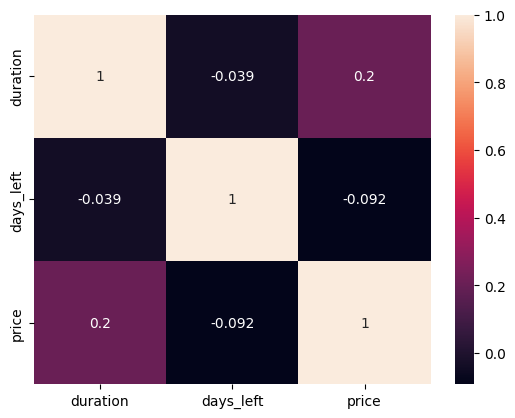

In [90]:
sns.heatmap(df_main.corr(), annot = True)
plt.show()

In [91]:
df_main[['airline_code', 'flight_number']] = df_main['flight'].str.split('-', n=1, expand=True)
df_main.drop("flight", axis = 1, inplace = True)
df_main.drop("airline_code", axis = 1, inplace = True)

In [92]:
df_main['flight_number'] = df_main['flight_number'].astype('int')

In [93]:
df_main.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,963


In [94]:
df_main.flight_number.value_counts()

808     3313
706     3235
772     2860
774     2808
720     2650
        ... 
8480       1
405        1
3211       1
9974       1
1058       1
Name: flight_number, Length: 1254, dtype: int64

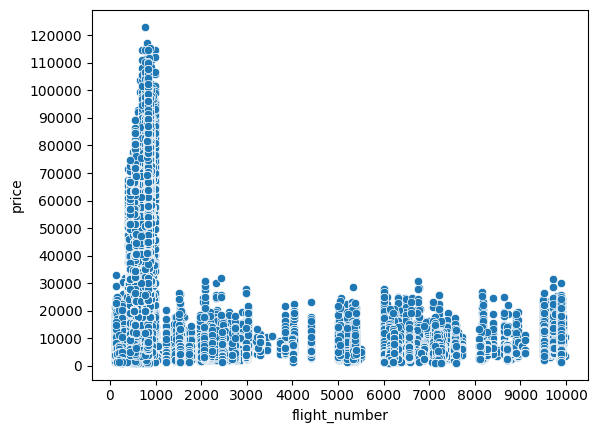

In [95]:
# df_main.groupby("flight_number")['price'].mean().plot()
sns.scatterplot(x = "flight_number", y = "price", data = df_main)
plt.xticks(range(0,10001,1000))
plt.yticks(range(0,120001,10000))
plt.show()

In [96]:
df_main.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,963


In [97]:
print(df_main.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'flight_number'],
      dtype='object')


In [98]:
df=df_main[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price']]
dfflask=df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left']]
dfflask.to_csv('df_final_Flight.csv')
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [99]:
Xflask=df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left',
       ]]
yflask=df['price']
Xflask_train, Xflask_test, yflask_train, yflask_test = train_test_split(Xflask, yflask, test_size=0.2, random_state=42)

In [100]:
dff=pd.read_csv('df_final_Flight.csv')

In [101]:
for column in dff.columns:
    unique_values = dff[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Unnamed: 0: [     0      1      2 ... 300150 300151 300152]
Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops: ['zero' 'one' 'two_or_more']
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']
Unique values in duration: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.

In [102]:
# Defining variables dependents and independents
X = pd.get_dummies(df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left']], drop_first=True)
y = df['price']
X.head(5)

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [103]:
X.columns

Index(['duration', 'days_left', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy'],
      dtype='object')

In [104]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train.shape[1]

30

# Label Encoding Categorical Values into Numerical Ones For Linear Regression

# Using Kfold & CV

In [106]:
model_Flight= LinearRegression()
model_Flight = model_Flight.fit(X_train,y_train)

In [107]:
y_pred = model_Flight.predict(X_test)

In [108]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')

Mean Squared Error: 45720769.75632412
r2: 0.9113048651706634


In [109]:
X_test['price_pred']=y_pred
X_test['price_real']=y_test
X_test.head(5)

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,price_pred,price_real
27131,19.75,40,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,3433.362099,7366
266857,9.83,42,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,55151.733244,64831
141228,10.50,41,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,10415.217744,6195
288329,14.50,14,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,54925.566380,60160
97334,8.25,20,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,6607.124458,6578


In [110]:
Xflask_test['usdprice_real']=y_test
Xflask_test['usdprice_pred']=y_pred
filtercity=Xflask_test[Xflask_test['airline']=='Air_India']
print(filtercity)

          airline source_city departure_time stops   arrival_time  \
27131   Air_India       Delhi        Morning   one  Early_Morning   
97334   Air_India   Bangalore      Afternoon   one          Night   
244517  Air_India      Mumbai          Night   one          Night   
254237  Air_India   Bangalore          Night   one      Afternoon   
233936  Air_India      Mumbai        Evening  zero        Evening   
...           ...         ...            ...   ...            ...   
101373  Air_India   Bangalore        Evening   one        Morning   
250572  Air_India   Bangalore  Early_Morning   one        Evening   
250775  Air_India   Bangalore  Early_Morning   one        Evening   
5234    Air_India       Delhi  Early_Morning   one        Evening   
168314  Air_India   Hyderabad  Early_Morning   one          Night   

       destination_city     class  duration  days_left  usdprice_real  \
27131           Kolkata   Economy     19.75         40           7366   
97334            Mumbai  

In [111]:
import joblib
joblib.dump(model_Flight, 'flight_prediction.joblib')

['flight_prediction.joblib']